In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lu_factor, lu_solve

In [2]:
def lu_tridiagonal(c, d, e, b):
    c = np.copy(c)
    d = np.copy(d)
    b = np.copy(b)
    n = len(d)

    for k in range(1, n):
        lam = c[k-1]/d[k-1]
        d[k] = d[k] - lam*e[k-1]
        c[k-1] = lam

    for k in range(1, n):
        b[k] = b[k] - c[k-1]*b[k-1]

    b[n-1] = b[n-1]/d[n-1]

    for k in range(n-2, -1, -1):
        b[k] = (b[k] - e[k]*b[k+1])/d[k]
    return b

In [3]:
def uxa(y):
    return 60

def uxb(y):
    return 40

def uyc(x):
    return 25

def boundary_conditions(uxa, uxb, xInterval, uyc, yInterval):
    """
    uxa: bottom boundary in xInterval
    uya, uyb: left and right boundary in yInterval
    """
    ubottom = np.empty(0)
    uleft = np.empty(0)
    uright = np.empty(0)

    for x in xInterval:
        ubottom = np.append(ubottom, uyc(x))

    for y in yInterval:
        uleft = np.append(uleft, uxa(y))
        uright = np.append(uright, uxb(y))

    return ubottom, uleft, uright

def parabolic_explicit(uxa, uxb, xInterval, uyc, yInterval, lam):
    ubottom, uleft, uright = boundary_conditions(
        uxa, uxb, xInterval, uyc, yInterval)
    m = len(uleft)
    n = len(ubottom)

    u = np.zeros((m, n))

    u[0, :] = ubottom
    u[:, 0] = uleft
    u[:, -1] = uright

    for j in range(m - 1):
        for i in range(1, n - 1):
            u[j+1, i] = lam*u[j, i-1] + (1-2*lam)*u[j, i] + lam*u[j, i+1]
    return u

def parabolic_implicit(uxa, uxb, xInterval, uyc, yInterval, lam):
    ubottom, uleft, uright = boundary_conditions(
        uxa, uxb, xInterval, uyc, yInterval)
    m = len(uleft)
    n = len(ubottom)

    u = np.zeros((m, n))
    u[0, :] = ubottom
    u[:, 0] = uleft
    u[:, -1] = uright
    
    c = np.full(n - 3, lam)
    d = np.full(n - 2, -(1 + 2*lam))
    e = np.copy(c)
    b = np.zeros_like(d)

    for j in range(1, m):
        b[0] = -u[j-1, 1] - lam*u[j, 0]
        b[1:n-3] = -u[j-1,2:n-2]    
        b[n - 3] = -u[j-1, n-2] - lam*u[j, n-1]
        u[j, 1:-1] = lu_tridiagonal(c, d, e, b)
    return u

[[60.         25.         25.         25.         40.        ]
 [60.         33.38660578 27.73972603 28.94216134 40.        ]
 [60.         38.79644109 31.11747044 31.88286084 40.        ]
 [60.         42.51881184 34.34355054 34.23348948 40.        ]
 [60.         45.21359497 37.16414777 36.16619366 40.        ]
 [60.         47.23794709 39.53677447 37.76716858 40.        ]
 [60.         48.79796454 41.49597271 39.09197648 40.        ]
 [60.         50.02084235 43.09887921 40.18418231 40.        ]
 [60.         50.99026952 44.404107   41.08101395 40.        ]
 [60.         51.76445004 45.46435137 41.81486361 40.        ]
 [60.         52.38569583 46.32450614 42.41370337 40.        ]]


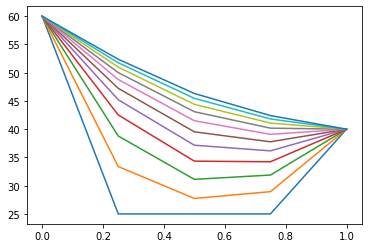

In [4]:
xa = 0
xb = 1
Δx = 0.25

ya = 0
yb = 1
Δy = 0.1
lam = Δy/(4*Δx**2)

xInterval = np.arange(xa, xb + Δx, Δx)
yInterval = np.arange(ya, yb + Δy, Δy)
u = parabolic_implicit(uxa, uxb, xInterval, uyc, yInterval, lam)
print(u)
for uk in u:
    plt.plot(xInterval, uk)
plt.show()